In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 4.0)
%matplotlib inline

# Data

WWe will use the training data to train our model, the validation data will be used to validate the model

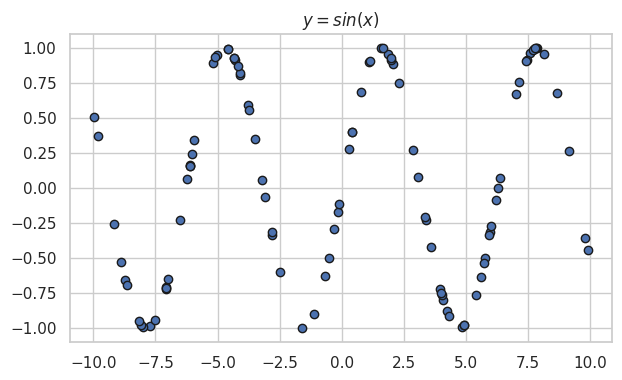

In [6]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o',mec='k')
plt.title('$y = sin(x)$');

In [8]:
y_train.unsqueeze_(1)
x_train.unsqueeze_(1);

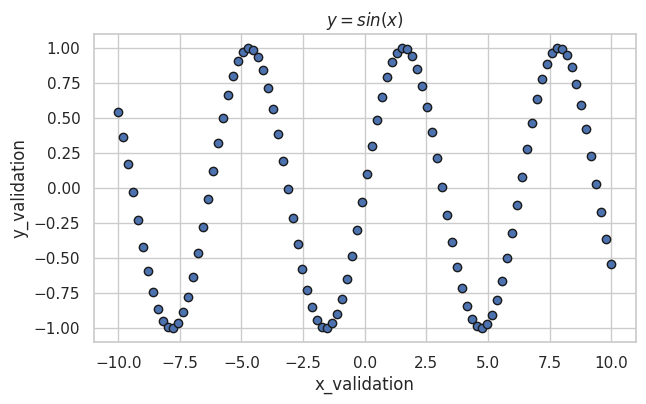

In [7]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o',mec='k')
plt.title('$y = sin(x)$');
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

Our model will consist of one hidden layer, which also uses the sigmoid activation function

In [ ]:
# create multilayered perceptron model

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(10000)

# for i in sine_net.parameters():
#     print(i)

# Prediction

- `predict` is a helper function which uses an imported model & makes a single forward pass
- Having defined the model SineNet, we have created random weights, lets confirm everything is working before we train the model

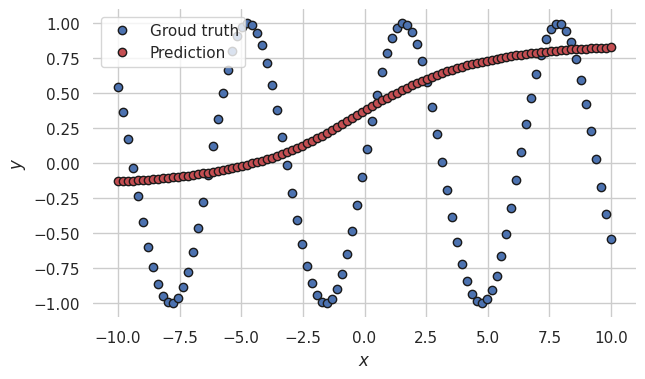

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x, y.numpy(), 'o', mec='k', label='Groud truth')
    plt.plot(x, y_pred.data.numpy(), 'o', mec='k',c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
    sns.despine(left=True, bottom=True)

    sns.set_style("whitegrid", {
        "ytick.major.size": 0.1,
        "ytick.minor.size": 0.05,
        'grid.linestyle': '--'})

# lets predict using randomly initialised weights
predict(sine_net, x_validation, y_validation)

# Model Preparation

Our loss function will be the mean squared error, Adam will be our optimiser of choice

tensor(0.0384, grad_fn=<MeanBackward0>)


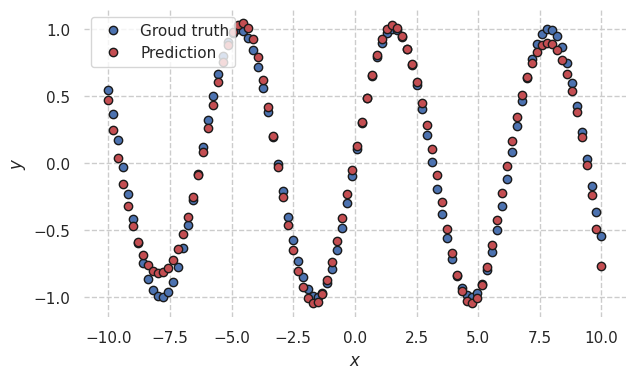

In [ ]:
'''

Set optimiser

'''

optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.001)


'''

Loss function

'''

# MSE 
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()
  
'''

Train Model

'''

# Train Model
for epoch_index in range(40000):

    optimizer.zero_grad() # reset gradient

    y_pred = sine_net.forward(x_train)  # forward pass
    loss_val = loss(y_pred, y_train)  # calculate loss

    loss_val.backward()  # backward propagation (get gradients)
    optimizer.step() # update weights

print(loss_val)

# Predition
predict(sine_net, x_validation, y_validation)